In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('dataset.csv')

In [ ]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
len(df)

545

In [ ]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
(df[df['mainroad'] == 'yes']['price'].mean() - df['price'].mean())/df['price'].mean()*100

4.72122643554157

In [ ]:
df[df['mainroad'] == 'yes'].pivot_table(index = ['guestroom'],
                                        columns = ['basement'],
                                        values = 'price',
                                        aggfunc = 'mean')

basement,no,yes
guestroom,,
no,4.625947e+06,5.151417e+06
yes,6.277104e+06,5.807508e+06


<Axes: >

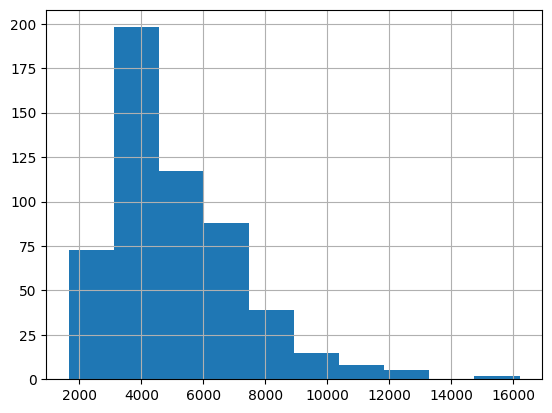

In [ ]:
df['area'].hist()

In [ ]:
bins = [1649, 3660, 6150, 9150, 13150, 16200]
df['area_grouped'] = pd.cut(df['area'],
                            bins,
                            labels = ['Piccola', 'Medio-piccola', 'Media', 'Medio-grande', 'Grande'])

<Axes: xlabel='area_grouped'>

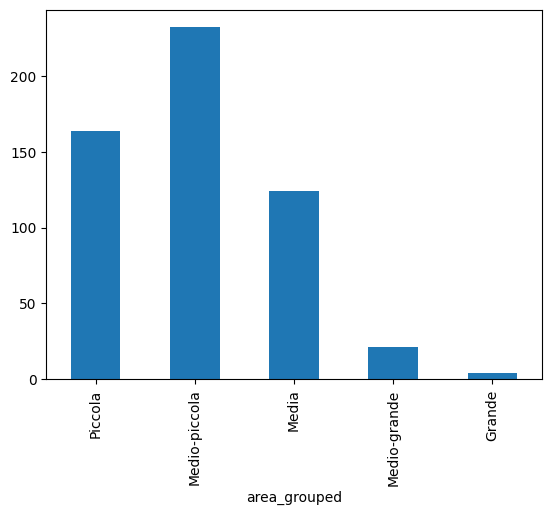

In [ ]:
df['area_grouped'] = pd.Categorical(df['area_grouped'],
                                    categories = ['Piccola', 'Medio-piccola', 'Media', 'Medio-grande', 'Grande'],
                                    ordered = True)
df['area_grouped'].value_counts().sort_index().plot(kind='bar')


In [ ]:
df['bedrooms'].groupby(df['area_grouped']).value_counts(sort = False)

<ipython-input-13-cffbd914f09a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['bedrooms'].groupby(df['area_grouped']).value_counts(sort = False)


area_grouped   bedrooms
Piccola        1             1
               2            55
               3            84
               4            20
               5             3
               6             1
Medio-piccola  1             1
               2            59
               3           125
               4            43
               5             3
               6             1
Media          1             0
               2            16
               3            78
               4            27
               5             3
               6             0
Medio-grande   1             0
               2             5
               3            11
               4             5
               5             0
               6             0
Grande         1             0
               2             1
               3             2
               4             0
               5             1
               6             0
Name: count, dtype: int64

Text(0, 0.5, 'Area')

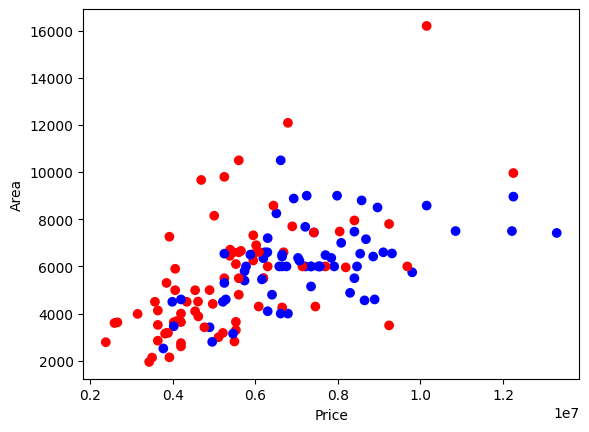

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = df[(df['bathrooms'] >= 2) & (df['bedrooms'] >= 2)]['airconditioning'] == 'yes'
plt.scatter(df[(df['bathrooms'] >= 2) & (df['bedrooms'] >= 2)]['price'],
            df[(df['bathrooms'] >= 2) & (df['bedrooms'] >= 2)]['area'],
            c=colors.map({True: 'blue', False: 'red'}))
plt.xlabel('Price')
plt.ylabel('Area')

In [ ]:
df = pd.read_csv('dataset.csv')

In [ ]:
dict = {'yes':1, 'no':0}
df[['mainroad', 'guestroom', 'basement',
    'hotwaterheating', 'airconditioning', 'prefarea']] = df[['mainroad', 'guestroom', 'basement',
                                                             'hotwaterheating', 'airconditioning',
                                                             'prefarea']].replace(dict)
df = pd.get_dummies(df)

<ipython-input-16-3da4d49f39ff>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  'prefarea']].replace(dict)


In [ ]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,True,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,True,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,False,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,True,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,False,False,True
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,False,True,False
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,False,False,True
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,True,False,False


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['price']),
                                                    df['price'],
                                                    test_size = 0.25)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
print("MSLE: ", mean_squared_log_error(y_test, linear_reg.predict(X_test)))
print("R2: ", r2_score(y_test, linear_reg.predict(X_test)))


MSLE:  0.0382273902510309
R2:  0.7605265448029328


In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 100)
sgd_reg.fit(X_train, y_train)
print("MSLE: ", mean_squared_log_error(y_test, sgd_reg.predict(X_test)))
print("R2: ", r2_score(y_test, sgd_reg.predict(X_test)))


MSLE:  462.8412791019792
R2:  -3.6471416483275633e+19


In [ ]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(linear_reg,
                      df.drop(columns = ['price']),
                      df['price'],
                      scoring='r2',
                      cv = 5).mean())
print(cross_val_score(sgd_reg,
                      df.drop(columns = ['price']),
                      df['price'],
                      scoring='r2',
                      cv = 5).mean())

-9.911963748665512
-1.966916873433701e+21


In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'loss':['squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
              'penalty':['l2', 'l1', 'elasticnet']}
sgd_optimised = GridSearchCV(sgd_reg, parameters)
sgd_optimised.fit(X_train, y_train)

GridSearchCV(estimator=SGDRegressor(max_iter=100),
             param_grid={'loss': ['squared_error', 'huber',
                                  'epsilon_insensitive',
                                  'squared_epsilon_insensitive'],
                         'penalty': ['l2', 'l1', 'elasticnet']})

In [ ]:
params = sgd_optimised.get_params()
print("MSLE: ", mean_squared_log_error(y_test, sgd_optimised.best_estimator_.predict(X_test)))
print("R2: ", r2_score(y_test, sgd_optimised.best_estimator_.predict(X_test)))

MSLE:  0.1137455257984588
R2:  0.25831860558092534


In [ ]:
high_corr_df = df[df.corr()['price'].sort_values()[::-1][0:6].index]

In [ ]:
high_corr_df

,price,area,bathrooms,airconditioning,stories,parking
0,13300000,7420,2,1,3,2
1,12250000,8960,4,1,4,3
2,12250000,9960,2,0,2,2
3,12215000,7500,2,1,2,3
4,11410000,7420,1,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,1,0,1,2
541,1767150,2400,1,0,1,0
542,1750000,3620,1,0,1,0
543,1750000,2910,1,0,1,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(high_corr_df.drop(columns = ['price']),
                                                    high_corr_df['price'],
                                                    test_size = 0.25)
linear_reg.fit(X_train, y_train)
sgd_reg.fit(X_train, y_train)
print("MSLE: ", mean_squared_log_error(y_test, linear_reg.predict(X_test)))
print("R2: ", r2_score(y_test, linear_reg.predict(X_test)))
print("MSLE: ", mean_squared_log_error(y_test, sgd_reg.predict(X_test)))
print("R2: ", r2_score(y_test, sgd_reg.predict(X_test)))


MSLE:  0.05749357475303101
R2:  0.578420272301148
MSLE:  481.4068611393439
R2:  -8.654674967006175e+19


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import FunctionTransformer

def add_area_bins(X, n_bins = 5):
    X = X.copy()
    discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
    X['area_bins'] = discretizer.fit_transform(X[['area']])
    return X

ss = StandardScaler()
coltran = ColumnTransformer(transformers = [('ss', ss, ['area',	'bedrooms', 'bathrooms',	'stories',
                                                        'mainroad',	'guestroom',	'basement',	'hotwaterheating',
                                                        'airconditioning',	'parking',	'prefarea'])],
                            remainder = 'passthrough')
add_bins = FunctionTransformer(add_area_bins, validate = False)
sgd_reg = SGDRegressor(loss = 'squared_error',
                       penalty = 'l2')
pipe = Pipeline(steps = [('add_bins', add_bins),
                         ('coltran', coltran),
                         ('sgd', sgd_reg)])

In [ ]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
coltran = ColumnTransformer(transformers = [('norm', norm, ['area',	'bedrooms', 'bathrooms',	'stories',
                                                            'mainroad',	'guestroom',	'basement',	'hotwaterheating',
                                                            'airconditioning',	'parking',	'prefarea'])])
coltran_bins = ColumnTransformer(transformers = [('kbin',
                                                  KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform'),
                                                  ['area'])])
union = FeatureUnion([('norm', coltran),
                      ('bins', coltran_bins)])
pipe = Pipeline(steps = [('union', union),
                         ('sgd', sgd_reg)])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['price']),
                                                    df['price'],
                                                    test_size = 0.25)
pipe.fit(X_train, y_train)
print("MSLE: ", mean_squared_log_error(y_test, pipe.predict(X_test)))
print("R2: ", r2_score(y_test, pipe.predict(X_test)))

MSLE:  0.05383496623892252
R2:  0.6618166138080446


In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
pipe = Pipeline(steps = [('add_bins', add_bins),
                         ('coltran', coltran),
                         ('kbest', SelectKBest(f_regression)),
                         ('sgd', sgd_reg)])
parameters = {'kbest__k':[5,7,10],
              'add_bins__kw_args':[{'n_bins':3}, {'n_bins':5}, {'n_bins':7}]}
pipe_opt = GridSearchCV(pipe, parameters)
pipe_opt.fit(X_train, y_train)
print("MSLE: ", mean_squared_log_error(y_test, pipe_opt.best_estimator_.predict(X_test)))
print("R2: ", r2_score(y_test, pipe_opt.best_estimator_.predict(X_test)))

MSLE:  0.05393868580567126
R2:  0.7084677350635917


In [ ]:
pipe_opt.best_params_

{'add_bins__kw_args': {'n_bins': 3}, 'kbest__k': 10}

In [ ]:
kbinss = KBinsDiscretizer(n_bins = 2)
coltran = ColumnTransformer(transformers = [('kbins', kbinss, ['bedrooms', 'bathrooms',	'stories']),
                                            ('ss',ss,['area'])],
                            remainder = 'passthrough')
sgd_reg = SGDRegressor(loss = 'squared_error',
                       penalty = 'l2')
new_pipe = Pipeline(steps = [('coltran', coltran),
                             ('sgd_reg', sgd_reg)])
new_pipe.fit(X_train, y_train)
print("MSLE: ", mean_squared_log_error(y_test, new_pipe.predict(X_test)))
print("R2: ", r2_score(y_test, new_pipe.predict(X_test)))

MSLE:  0.058676447511002414
R2:  0.63154654687824


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(
